In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

def evaluate(y,y_hat,labels):
  print(classification_report(y,y_hat))
  cm = confusion_matrix(y,y_hat,normalize='true')
  cmat = pd.DataFrame(cm)
  cmat.columns = labels
  sns.heatmap(cmat,cmap="YlGnBu", annot=True)
  plt.title("Confusion Matrix")

# 0 : DRAW, 1 : HOME WIN, 2: AWAY WIN
df = pd.read_csv('../data/games_data.csv') 
df = df.drop(['odds_home', 'odds_away', 'odds_draw'], axis=1)

In [25]:
####
# split data / target, look at the baseline
# normalize manually the data
###########
x = df[[x for x in df.columns if x != 'result']]
y = df['result']

# nomalize the data (is this necessary)
column_maxes = x.max()
x_max = column_maxes.max()
normalized_x = x / x_max

x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=42, stratify=y)


(y.value_counts()/y.shape[0])*100

1    45.068600
2    29.657434
0    25.273967
Name: result, dtype: float64

In [26]:
####
# Evaluate some classification algorithm
##################
names = [
    "Neural Net",
    "Dummy (baseline)",
    "Logistic",
    "Ridge",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    MLPClassifier(solver='lbfgs', max_iter=1000, alpha=0.05, learning_rate='constant'),
    DummyClassifier(),
    LogisticRegression(class_weight='balanced', solver='liblinear'),
    RidgeClassifier(class_weight='balanced', max_iter=10000, alpha=1.08, solver='sag'),
    KNeighborsClassifier(3, n_jobs=-1),
    SVC(kernel="linear", C=0.025, class_weight='balanced'),
    SVC(gamma=2, C=1, class_weight='balanced'),
    DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto', class_weight='balanced', n_jobs=-1),
    AdaBoostClassifier(),
    GaussianNB(var_smoothing=0.657933224657568),
]

results = pd.DataFrame(columns=['classifier', 'accuracy_train', 'f1_train', 'accuracy_test', 'f1_test'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    f1_score_train = round(f1_score(y_train, y_train_pred, average='weighted')*100,2)
    f1_score_test = round(f1_score(y_test, y_test_pred, average='weighted')*100,2)
    score_train = round(accuracy_score(y_train, y_train_pred)*100, 2)
    score_test = round(accuracy_score(y_test, y_test_pred)*100, 2)

    print('Accuracy (train, test) for classifier {} are : {}%, {}%, f1 : {}, {}'.format(name, score_train, score_test, f1_score_train, f1_score_test))

    result = {'classifier':name, 'accuracy_train':score_train, 'f1_train':f1_score_train, 'accuracy_test':score_test, 'f1_test':f1_score_test}
    print(result)
    results = results.append(result, ignore_index=True)

Accuracy (train, test) for classifier Neural Net are : 52.04%, 50.91%, f1 : 44.29, 43.06
{'classifier': 'Neural Net', 'accuracy_train': 52.04, 'f1_train': 44.29, 'accuracy_test': 50.91, 'f1_test': 43.06}
Accuracy (train, test) for classifier Dummy (baseline) are : 45.07%, 45.06%, f1 : 28.01, 27.99
{'classifier': 'Dummy (baseline)', 'accuracy_train': 45.07, 'f1_train': 28.01, 'accuracy_test': 45.06, 'f1_test': 27.99}
Accuracy (train, test) for classifier Logistic are : 50.82%, 49.85%, f1 : 44.72, 43.71
{'classifier': 'Logistic', 'accuracy_train': 50.82, 'f1_train': 44.72, 'accuracy_test': 49.85, 'f1_test': 43.71}
Accuracy (train, test) for classifier Ridge are : 49.35%, 47.58%, f1 : 47.43, 45.41
{'classifier': 'Ridge', 'accuracy_train': 49.35, 'f1_train': 47.43, 'accuracy_test': 47.58, 'f1_test': 45.41}
Accuracy (train, test) for classifier Nearest Neighbors are : 67.5%, 42.19%, f1 : 67.84, 42.56
{'classifier': 'Nearest Neighbors', 'accuracy_train': 67.5, 'f1_train': 67.84, 'accuracy_te

           classifier  accuracy_train  f1_train  accuracy_test  f1_test
9            AdaBoost           51.87     43.80          50.63    42.66
0          Neural Net           51.88     43.58          50.60    42.41
10        Naive Bayes           51.31     42.85          50.24    41.89
2            Logistic           50.82     44.72          49.85    43.71
3               Ridge           49.35     47.44          47.56    45.39
1    Dummy (baseline)           45.07     28.01          45.06    27.99
6             RBF SVM           46.82     47.91          44.80    46.00
8       Random Forest           47.54     48.64          44.05    45.15
5          Linear SVM           46.19     47.19          44.03    45.11
7       Decision Tree           46.61     47.32          42.77    43.47
4   Nearest Neighbors           67.50     67.84          42.19    42.56


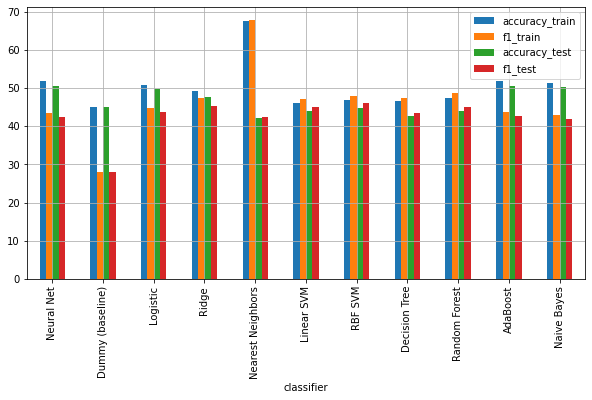

In [20]:
print(results.head(15).sort_values('accuracy_test', ascending=False))
ax = results.plot(x='classifier', kind='bar', figsize=(10,5), grid=True)

In [169]:
#####
#### PROCESSING TIME is about 12 hours on Mac M1
#### Best are  solver='lbfgs', max_iter=1000, alpha=0.05, learning_rate='constant')
######

""" from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_classifier, parameter_space, n_jobs=-1, cv=4)
clf.fit(x_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


y_true, y_pred = y_test , clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred)) """

' from sklearn.model_selection import GridSearchCV\n\nparameter_space = {\n    \'hidden_layer_sizes\': [(50,50,50), (50,100,50), (100,)],\n    \'activation\': [\'tanh\', \'relu\'],\n    \'alpha\': [0.0001, 0.05],\n    \'learning_rate\': [\'constant\',\'adaptive\'],\n}\n\nclf = GridSearchCV(mlp_classifier, parameter_space, n_jobs=-1, cv=4)\nclf.fit(x_train, y_train)\n\n# Best paramete set\nprint(\'Best parameters found:\n\', clf.best_params_)\n\n# All results\nmeans = clf.cv_results_[\'mean_test_score\']\nstds = clf.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, clf.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))\n\n\ny_true, y_pred = y_test , clf.predict(x_test)\n\nfrom sklearn.metrics import classification_report\nprint(\'Results on the test set:\')\nprint(classification_report(y_true, y_pred)) '

In [90]:
team_stats = pd.read_csv('england_stats.csv')
team_stats.head()

,name,odds_home,odds_away,odds_draw,home_wins,home_draws,home_losses,home_goals,home_opposition_goals,home_shots,...,away_wins,away_draws,away_losses,away_goals,away_opposition_goals,away_shots,away_shots_on_target,away_opposition_shots,away_opposition_shots_on_target,league
0,Southampton,2.256667,3.206667,3.433333,3.0,5.0,4.0,9.0,14.0,129.0,...,3.0,5.0,4.0,10.0,17.0,140.0,40.0,128.0,46.0,England
1,Man United,2.733333,3.983333,4.026667,5.0,2.0,5.0,19.0,21.0,160.0,...,4.0,2.0,5.0,14.0,20.0,149.0,49.0,154.0,52.0,England
2,Brentford,2.033333,4.150000,3.500000,3.0,3.0,5.0,14.0,19.0,123.0,...,3.0,3.0,5.0,14.0,17.0,127.0,47.0,132.0,49.0,England
3,Chelsea,1.322500,10.750000,5.562500,8.0,2.0,2.0,26.0,9.0,175.0,...,7.0,3.0,1.0,25.0,9.0,178.0,64.0,108.0,35.0,England
4,Crystal Palace,2.275000,3.275000,3.275000,3.0,6.0,3.0,18.0,14.0,129.0,...,3.0,6.0,3.0,17.0,15.0,128.0,42.0,123.0,47.0,England


In [139]:
def get_result(predictor, HomeTeam, AwayTeam):
   
   home_stat = team_stats[team_stats['name']==HomeTeam][['home_wins',
       'home_draws', 'home_losses', 'home_goals', 'home_opposition_goals',
       'home_shots', 'home_shots_on_target', 'home_opposition_shots',
       'home_opposition_shots_on_target']]

   away_stat = team_stats[team_stats['name']==AwayTeam][['away_wins', 'away_draws',
       'away_losses', 'away_goals', 'away_opposition_goals', 'away_shots',
       'away_shots_on_target', 'away_opposition_shots',
       'away_opposition_shots_on_target']]

   stats = np.concatenate((home_stat.values.reshape(-1), away_stat.values.reshape(-1)))
   #stats = np.concatenate((home_stat.values.reshape(-1), home_stat.values.reshape(-1)))

   #stats = stats/x_max
   
   result = predictor.predict([stats])[0]

   print(predictor.predict_proba([stats]))

   if (result==0):
      return 'D'

   if (result==1):
      return 'H'

   return'A'
    

In [137]:
#last_games = pd.read_csv('last_eng.csv')
URL_FRANCE_LEAGUE = 'https://www.football-data.co.uk/mmz4281/2122/F1.csv'
URL_ENGLAND_LEAGUE = 'https://www.football-data.co.uk/mmz4281/2122/E0.csv'

last_games = pd.read_csv(URL_ENGLAND_LEAGUE).tail(20)

last_games.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
186,E0,02/01/2022,14:00,Brentford,Aston Villa,2,1,H,1,1,...,1.72,0.00,2.04,1.89,2.06,1.88,2.21,1.92,2.03,1.86
187,E0,02/01/2022,14:00,Everton,Brighton,2,3,A,0,2,...,1.62,0.00,2.11,1.82,2.01,1.92,2.13,2.07,2.00,1.88
188,E0,02/01/2022,14:00,Leeds,Burnley,3,1,H,1,0,...,2.01,-0.50,2.10,1.83,2.11,1.81,2.14,1.90,2.06,1.84
189,E0,02/01/2022,16:30,Chelsea,Liverpool,2,2,D,2,2,...,2.11,0.00,1.87,2.06,1.94,1.98,2.01,2.06,1.90,1.98
190,E0,03/01/2022,17:30,Man United,Wolves,0,1,A,0,0,...,1.75,-0.75,2.00,1.95,1.97,1.95,2.00,2.15,1.90,1.99


In [140]:
import warnings
warnings.filterwarnings("ignore")

mlp_classifier = MLPClassifier(solver='lbfgs', max_iter=1000, alpha=0.05, learning_rate='constant'),

good_score = 0
bad_score = 0
for idx, game in last_games.iterrows():
    pred = get_result(mlp_classifier,last_games.loc[idx, 'HomeTeam'], last_games.loc[idx, 'AwayTeam'])
    #if (last_games.loc[idx, 'FTR']=='D'):
    #    continue

    if (pred ==  last_games.loc[idx, 'FTR']):
        print ('{} versus {} : {} {} GOOD PREDICTION'.format(
            last_games.loc[idx, 'HomeTeam'], 
            last_games.loc[idx, 'AwayTeam'],
            last_games.loc[idx, 'FTR'],
            pred))
        good_score += 1
    else:
        print ('{} versus {} : {} {} BAD PREDICTION'.format(
            last_games.loc[idx, 'HomeTeam'], 
            last_games.loc[idx, 'AwayTeam'],
            last_games.loc[idx, 'FTR'],
            pred))
        bad_score += 1

print(good_score, bad_score)
print('Pourcentage bonne predictions : ', (good_score)/(good_score+bad_score))

[[4.22383164e-155 1.00000000e+000 5.67357766e-135]]
Tottenham versus Crystal Palace : H H GOOD PREDICTION
[[5.64613862e-262 1.00000000e+000 1.29684097e-272]]
West Ham versus Southampton : A H BAD PREDICTION
[[1.39520284e-134 6.69029877e-012 1.00000000e+000]]
Aston Villa versus Chelsea : A A GOOD PREDICTION
[[2.25836457e-134 1.00000000e+000 1.84426497e-143]]
Brighton versus Brentford : H H GOOD PREDICTION
[[8.12174796e-136 1.00000000e+000 2.77317096e-117]]
Newcastle versus Man United : D H BAD PREDICTION
[[2.5320416e-202 1.0000000e+000 2.5476804e-262]]
Crystal Palace versus Norwich : H H GOOD PREDICTION
[[1.06620600e-143 1.00000000e+000 8.25582119e-184]]
Southampton versus Tottenham : D H BAD PREDICTION
[[1.00182625e-152 1.00000000e+000 1.91904032e-104]]
Watford versus West Ham : A H BAD PREDICTION
[[2.37832104e-165 1.07455137e-035 1.00000000e+000]]
Leicester versus Liverpool : H A BAD PREDICTION
[[4.76220588e-291 1.00000000e+000 0.00000000e+000]]
Chelsea versus Brighton : D H BAD PREDI